In [18]:
import xarray as xr
import pandas as pd
path = '/Users/ls/Downloads/data.grib'
data = '/Users/ls/Downloads/ship_data.csv'
ship = pd.read_csv(data,sep=',')
df1 = xr.open_dataset(path)

skipping variable: paramId==140230 shortName='mwd'
Traceback (most recent call last):
  File "/Users/ls/opt/anaconda3/lib/python3.12/site-packages/cfgrib/dataset.py", line 721, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/Users/ls/opt/anaconda3/lib/python3.12/site-packages/cfgrib/dataset.py", line 639, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='latitude' value=Variable(dimensions=('latitude',), data=array([ 24.  ,  23.75,  23.5 ,  23.25,  23.  ,  22.75,  22.5 ,  22.25,
        22.  ,  21.75,  21.5 ,  21.25,  21.  ,  20.75,  20.5 ,  20.25,
        20.  ,  19.75,  19.5 ,  19.25,  19.  ,  18.75,  18.5 ,  18.25,
        18.  ,  17.75,  17.5 ,  17.25,  17.  ,  16.75,  16.5 ,  16.25,
        16.  ,  15.75,  15.5 ,  15.25,  15.  ,  14.75,  14.5 ,  14.25,
        14.  ,  13.75,  13.5 ,  13.25,  13.  ,  12.75,  12.5 ,  12.25,
        12.  ,  11.75,  11.5 ,  11.25,  11.  ,  10.75,  10.5 ,

In [19]:
WVPI = ship.loc[0,'wvpi'].split(',')
WVPI = [int(WVPI[i]) for i in range(len(WVPI))]
WD_min = ship.loc[0,'wd_min'].split(',')
WD_min = [int(WD_min[i]) for i in range(len(WD_min))]

In [20]:
df1

<xarray.Dataset>
Dimensions:     (time: 1632, latitude: 257, longitude: 401)
Coordinates:
    number      int64 ...
  * time        (time) datetime64[ns] 2019-01-01 ... 2024-08-01T23:00:00
    step        timedelta64[ns] ...
    surface     float64 ...
  * latitude    (latitude) float64 24.0 23.75 23.5 23.25 ... -39.5 -39.75 -40.0
  * longitude   (longitude) float64 0.0 0.25 0.5 0.75 ... 99.25 99.5 99.75 100.0
    valid_time  (time) datetime64[ns] ...
Data variables:
    u10         (time, latitude, longitude) float32 ...
    v10         (time, latitude, longitude) float32 ...
    meanSea     float64 ...
    sst         (time, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-08-31T00:21 GRIB to CDM+CF via cfgrib-0.9.1...

In [39]:
u10 = df1.u10.data[1:100,1:100,1:100]  # Extract u10 data
v10 = df1.v10.data[1:100,1:100,1:100]  # Extract v10 data
time = df1.time.data[1:100]  # Extract time data
latitudes = df1.latitude.data[1:100]  # Extract latitude data
longitudes = df1.longitude.data[257:158:-1]  # Extract longitude data


In [22]:
len(latitudes)

99

In [23]:
(pd.DataFrame([latitudes,longitudes,u10]).T).iloc[0:62]

,0,1,2
0,23.75,64.25,"[[-2.4787598, -2.2785645, -2.1281738, -2.03149..."
1,23.5,64.0,"[[-2.643036, -2.3940125, -2.1752625, -2.006317..."
2,23.25,63.75,"[[-2.6521149, -2.4519196, -2.2761383, -2.13746..."
3,23.0,63.5,"[[-2.7731476, -2.6461945, -2.5319366, -2.41963..."
4,22.75,63.25,"[[-2.8013153, -2.6821747, -2.5737762, -2.44682..."
...,...,...,...
57,9.5,50.0,"[[-3.8900604, -3.6840057, -3.5111542, -3.40275..."
58,9.25,49.75,"[[-4.2444, -4.110611, -4.0334625, -4.014908, -..."
59,9.0,49.5,"[[-4.8278656, -4.788803, -4.7682953, -4.749740..."
60,8.75,49.25,"[[-5.194763, -5.142029, -5.0932007, -5.032654,..."


In [24]:
df1

<xarray.Dataset>
Dimensions:     (time: 1632, latitude: 257, longitude: 401)
Coordinates:
    number      int64 ...
  * time        (time) datetime64[ns] 2019-01-01 ... 2024-08-01T23:00:00
    step        timedelta64[ns] ...
    surface     float64 ...
  * latitude    (latitude) float64 24.0 23.75 23.5 23.25 ... -39.5 -39.75 -40.0
  * longitude   (longitude) float64 0.0 0.25 0.5 0.75 ... 99.25 99.5 99.75 100.0
    valid_time  (time) datetime64[ns] ...
Data variables:
    u10         (time, latitude, longitude) float32 -2.734 -2.582 ... 5.798
    v10         (time, latitude, longitude) float32 -4.549 -4.678 ... -7.476
    meanSea     float64 ...
    sst         (time, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-08-31T00:21 GRIB to CDM+CF via cfgrib-0.9.1...

In [25]:
import numpy as np


nodes = np.array([[lat, lon] for lat in latitudes for lon in longitudes])
# latitudes = latitudes[:, :100]
# longitudes = longitude[:, :100]
# u10 = u10[:, :100]  # Subset the first 100 nodes, for example
# v10 = v10[:, :100]
# nodes = nodes[:100]
# time = time[:100]



u = u10.reshape(len(time), len(latitudes) * len(longitudes))
v = v10.reshape(len(time), len(latitudes) * len(longitudes))


In [26]:
import numpy as np
from datetime import datetime
from scipy.interpolate import griddata

from halem import BaseRoadmap, HALEM_space, HALEM_time, plot_timeseries, HALEM_cost,HALEM_co2

import matplotlib.pyplot as plt

In [27]:
import numpy as np
from halem import BaseRoadmap

class CustomRoadmap(BaseRoadmap):
    def __init__(
        self,
        u10,  
        v10,  
        time, 
        nodes,  
        number_of_neighbor_layers=1,  
        vship=np.array([[10, 40, 80], [10, 50, 100]]),
        WD_min=WD_min
        WVPI=WVPI,
        WWL=data.wvpi,
        LWL=data.lwl,
        ukc=data.ukc,
        nl=(data.nl_c,data.nl_m),
        blend=data.blend,
        nodes_index=None,
        *args,
        **kwargs
    ):
        
        self.time = time.astype('datetime64[ns]').astype(np.float64)
        self.u10 = u10
        self.v10 = v10
        self.nodes = nodes
        super().__init__(
            number_of_neighbor_layers=number_of_neighbor_layers,
            vship=vship,
            WD_min=WD_min,
            WVPI=WVPI,
            WWL=WWL,
            LWL=LWL,
            ukc=ukc,
            nl=nl,
            blend=blend,
            nodes_index=nodes_index,
            *args,
            **kwargs
        )

    def load(self):
        """This method loads the necessary data for the roadmap.
        It returns a dictionary with keys corresponding to time, nodes, u, v, and water depth.
        """
        
        WD = np.full(self.u10.shape, 50)  

        return {
            "time": self.time,
            "nodes": self.nodes,
            "u": self.u10,
            "v": self.v10,
            "water_depth": WD,
        }
    def parse(self):
        print("Loading hydrodynamic data...")
        self.load_hydrodynamic()
        print("Hydrodynamic data loaded.")

        
        if self.nodes_index is None:
            print("Reducing nodes...")
            self.nodes_index, self.LS = self.get_nodes()
            print("Node reduction completed.")
        else:
            self.nodes_index = self.nodes_index
            self.LS = None
            print("Using precomputed nodes index.")
    
        nodes = self.nodes[self.nodes_index]
        u = np.asarray(np.transpose(self.u))[self.nodes_index]
        v = np.asarray(np.transpose(self.v))[self.nodes_index]
        WD = np.asarray(np.transpose(self.WD))[self.nodes_index]
    
        print("Nodes, u, v, WD loaded for land.")
        self.nodes, self.u, self.v, self.WD = self.nodes_on_land(nodes, u, v, WD)
        self.tria = scipy.spatial.Delaunay(self.nodes)
        self.mask = np.full(self.u.shape, False)
        self.mask[self.WD < self.WD_min.max() + self.ukc] = True
        print("Mask applied.")
    
        
        print("Calculating edges...")
        graph0 = Graph()
        for from_node in range(len(self.nodes)):
            if from_node % 100 == 0:  # Print progress every 100 nodes
                print(f"Processed {from_node} nodes out of {len(self.nodes)}")
            to_nodes = functions.find_neighbors2(
                from_node, self.tria, self.number_of_neighbor_layers
            )
            for to_node in to_nodes:
                L = functions.haversine(self.nodes[from_node], self.nodes[int(to_node)])
                graph0.add_edge(from_node, int(to_node), L)
        self.graph = Graph()
        vship1 = self.vship[0]
        for edge in graph0.weights:
            for i in range(len(vship1)):
                for j in range(len(vship1)):
                    from_node = edge[0]
                    to_node = edge[1]
                    self.graph.add_edge((from_node, i), (to_node, j), 1)

        print("Edge calculation completed.")
        
        calc_weights = self.calc_weights_time
        self.weight_space = []
        self.weight_time = []
        self.weight_cost = []
        self.weight_co2 = []

        for vv in range(len(self.vship)):
            print(f"doing{vv}")
            graph_time = Graph()
            graph_space = Graph()
            graph_cost = Graph()
            graph_co2 = Graph()
            vship = self.vship[vv]
            WD_min = self.WD_min[vv]
            WVPI = self.WVPI[vv]
            for edge in graph0.weights:
                for i in range(len(vship)):
                    for j in range(len(vship)):
                        from_node = edge[0]
                        to_node = edge[1]

                        L, W, euros, co2 = calc_weights(
                            edge,
                            i,
                            j,
                            vship,
                            WD_min,
                            WVPI,
                            self,
                            self.compute_cost,
                            self.compute_co2,
                            self.number_of_neighbor_layers,
                        )

                        graph_time.add_edge((from_node, i), (to_node, j), W)
                        graph_space.add_edge((from_node, i), (to_node, j), L)
                        graph_cost.add_edge((from_node, i), (to_node, j), euros)
                        graph_co2.add_edge((from_node, i), (to_node, j), co2)

            if "space" in self.optimization_type:
                self.weight_space.append(graph_space)
            if "time" in self.optimization_type:
                self.weight_time.append(graph_time)
            if "cost" in self.optimization_type:
                self.weight_cost.append(graph_cost)
            if "co2" in self.optimization_type:
                self.weight_co2.append(graph_co2)

    def calc_weights_time(
        self,
        edge,
        i,
        j,
        vship,
        WD_min,
        WVPI,
        self_f,
        compute_cost,
        compute_co2,
        number_of_neighbor_layers,
    ):
        
        from_node = edge[0]
        W = (
            functions.costfunction_timeseries(
                edge,
                vship[j],
                WD_min,
                self_f,
                WVPI,
                number_of_neighbor_layers,
                self_f.tria,
            )
            + self_f.t
        )
        W = self.fifo_maker(W, self_f.mask[from_node]) - self_f.t

        L = functions.costfunction_spaceseries(
            edge, vship[j], WD_min, self_f, WVPI, number_of_neighbor_layers, self_f.tria
        )
        L = L + np.arange(len(L)) * (1 / len(L))
        L = self.fifo_maker(L, self_f.mask[from_node]) - np.arange(len(L)) * (
            1 / len(L)
        )
        euros = compute_cost(W, vship[j])
        co2 = compute_co2(W, vship[j])

        return L, W, euros, co2

    @staticmethod
    def fifo_maker(y, N1):
        
        arg = np.squeeze(argrelextrema(y, np.less))
        if arg.shape == ():
            arg = np.array([arg])
        else:
            None
        y_FIFO = 1 * y
        for a in arg:
            loc = np.argwhere(y[: a + 1] <= y[a])[-2:]
            if loc.shape == (2, 1):
                if (N1[int(loc[0]) : int(loc[1])]).any():

                    None
                else:
                    y_FIFO[int(loc[0]) : int(loc[1])] = y[a].item()

        return y_FIFO

        


In [28]:

roadmap = CustomRoadmap(
    u10=u,  
    v10=v,  
    time=time,  
    nodes=nodes,
    dx_min=0.1 
)


class Graph:
    

    def __init__(self):
        
        self.edges = defaultdict(list)
        self.weights = {}

    def add_edge(self, from_node, to_node, weight):

        self.edges[from_node].append(to_node)
        self.weights[(from_node, to_node)] = weight



In [29]:
from abc import ABC, abstractmethod
from collections import defaultdict

import numpy as np
import scipy.spatial
from numpy import ma
from scipy.signal import argrelextrema

import halem.functions as functions

roadmap.parse()

Loading hydrodynamic data...
Hydrodynamic data loaded.
Reducing nodes...
Node reduction completed.
Nodes, u, v, WD loaded for land.
Mask applied.
Calculating edges...
Processed 0 nodes out of 9801
Processed 100 nodes out of 9801
Processed 200 nodes out of 9801
Processed 300 nodes out of 9801
Processed 400 nodes out of 9801
Processed 500 nodes out of 9801
Processed 600 nodes out of 9801
Processed 700 nodes out of 9801
Processed 800 nodes out of 9801
Processed 900 nodes out of 9801
Processed 1000 nodes out of 9801
Processed 1100 nodes out of 9801
Processed 1200 nodes out of 9801
Processed 1300 nodes out of 9801
Processed 1400 nodes out of 9801
Processed 1500 nodes out of 9801
Processed 1600 nodes out of 9801
Processed 1700 nodes out of 9801
Processed 1800 nodes out of 9801
Processed 1900 nodes out of 9801
Processed 2000 nodes out of 9801
Processed 2100 nodes out of 9801
Processed 2200 nodes out of 9801
Processed 2300 nodes out of 9801
Processed 2400 nodes out of 9801
Processed 2500 nodes

/var/folders/9p/34kjp0md5tv5sz77mfqf7y440000gn/T/ipykernel_14045/3515792575.py:209: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  if (N1[int(loc[0]) : int(loc[1])]).any():
/var/folders/9p/34kjp0md5tv5sz77mfqf7y440000gn/T/ipykernel_14045/3515792575.py:213: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_FIFO[int(loc[0]) : int(loc[1])] = y[a].item()


doing1


In [30]:
longitudes

array([64.25, 64.  , 63.75, 63.5 , 63.25, 63.  , 62.75, 62.5 , 62.25,
       62.  , 61.75, 61.5 , 61.25, 61.  , 60.75, 60.5 , 60.25, 60.  ,
       59.75, 59.5 , 59.25, 59.  , 58.75, 58.5 , 58.25, 58.  , 57.75,
       57.5 , 57.25, 57.  , 56.75, 56.5 , 56.25, 56.  , 55.75, 55.5 ,
       55.25, 55.  , 54.75, 54.5 , 54.25, 54.  , 53.75, 53.5 , 53.25,
       53.  , 52.75, 52.5 , 52.25, 52.  , 51.75, 51.5 , 51.25, 51.  ,
       50.75, 50.5 , 50.25, 50.  , 49.75, 49.5 , 49.25, 49.  , 48.75,
       48.5 , 48.25, 48.  , 47.75, 47.5 , 47.25, 47.  , 46.75, 46.5 ,
       46.25, 46.  , 45.75, 45.5 , 45.25, 45.  , 44.75, 44.5 , 44.25,
       44.  , 43.75, 43.5 , 43.25, 43.  , 42.75, 42.5 , 42.25, 42.  ,
       41.75, 41.5 , 41.25, 41.  , 40.75, 40.5 , 40.25, 40.  , 39.75])

In [31]:
latitudes

array([23.75, 23.5 , 23.25, 23.  , 22.75, 22.5 , 22.25, 22.  , 21.75,
       21.5 , 21.25, 21.  , 20.75, 20.5 , 20.25, 20.  , 19.75, 19.5 ,
       19.25, 19.  , 18.75, 18.5 , 18.25, 18.  , 17.75, 17.5 , 17.25,
       17.  , 16.75, 16.5 , 16.25, 16.  , 15.75, 15.5 , 15.25, 15.  ,
       14.75, 14.5 , 14.25, 14.  , 13.75, 13.5 , 13.25, 13.  , 12.75,
       12.5 , 12.25, 12.  , 11.75, 11.5 , 11.25, 11.  , 10.75, 10.5 ,
       10.25, 10.  ,  9.75,  9.5 ,  9.25,  9.  ,  8.75,  8.5 ,  8.25,
        8.  ,  7.75,  7.5 ,  7.25,  7.  ,  6.75,  6.5 ,  6.25,  6.  ,
        5.75,  5.5 ,  5.25,  5.  ,  4.75,  4.5 ,  4.25,  4.  ,  3.75,
        3.5 ,  3.25,  3.  ,  2.75,  2.5 ,  2.25,  2.  ,  1.75,  1.5 ,
        1.25,  1.  ,  0.75,  0.5 ,  0.25,  0.  , -0.25, -0.5 , -0.75])

In [32]:
t0 = "01/01/2024 00:00:00"  # Departure time

start = ( 64, 28)
stop = ( 51, 11)
v_max = 8


path_t, time_t, dist_t = HALEM_time(start, stop, t0, v_max, roadmap)
path_s, time_s, dist_s = HALEM_space(start, stop, t0, v_max, roadmap)
path_c, time_c, dist_c = HALEM_cost(start, stop, t0, v_max, roadmap)
path_p, time_p, dist_p = HALEM_co2(start, stop, t0, v_max, roadmap)

In [33]:
path_t

array([[64.  , 23.75],
       [64.  , 23.5 ],
       [63.75, 23.25],
       [63.5 , 23.  ],
       [63.25, 22.75],
       [63.  , 22.75],
       [62.75, 22.5 ],
       [62.75, 22.25],
       [62.5 , 22.  ],
       [62.5 , 21.75],
       [62.25, 21.5 ],
       [62.  , 21.25],
       [61.75, 21.  ],
       [61.5 , 20.75],
       [61.25, 20.5 ],
       [61.  , 20.25],
       [60.75, 20.  ],
       [60.75, 19.75],
       [60.5 , 19.5 ],
       [60.25, 19.5 ],
       [60.  , 19.25],
       [59.75, 19.  ],
       [59.75, 18.75],
       [59.5 , 18.5 ],
       [59.25, 18.25],
       [59.  , 18.  ],
       [58.75, 18.  ],
       [58.75, 17.75],
       [58.5 , 17.5 ],
       [58.25, 17.25],
       [58.  , 17.  ],
       [57.75, 17.  ],
       [57.5 , 16.75],
       [57.25, 16.5 ],
       [57.  , 16.25],
       [56.75, 16.  ],
       [56.5 , 15.75],
       [56.25, 15.5 ],
       [56.  , 15.5 ],
       [55.75, 15.25],
       [55.5 , 15.25],
       [55.25, 15.  ],
       [55.  , 14.75],
       [55.

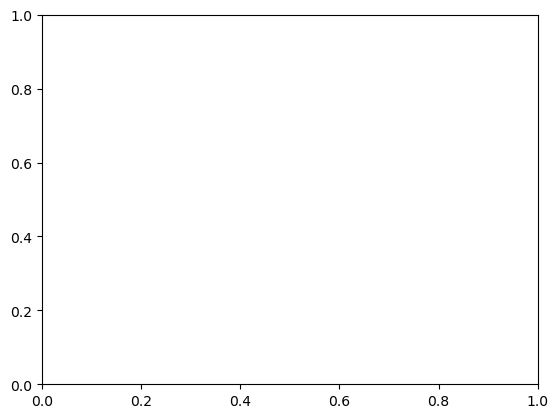

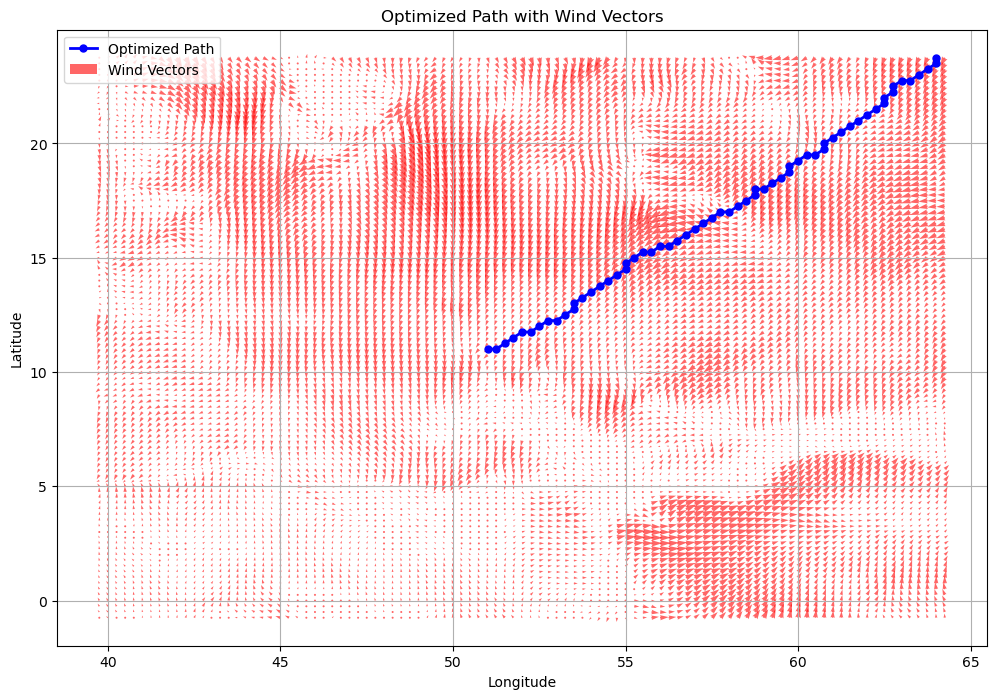

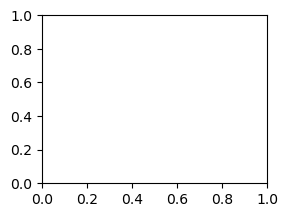

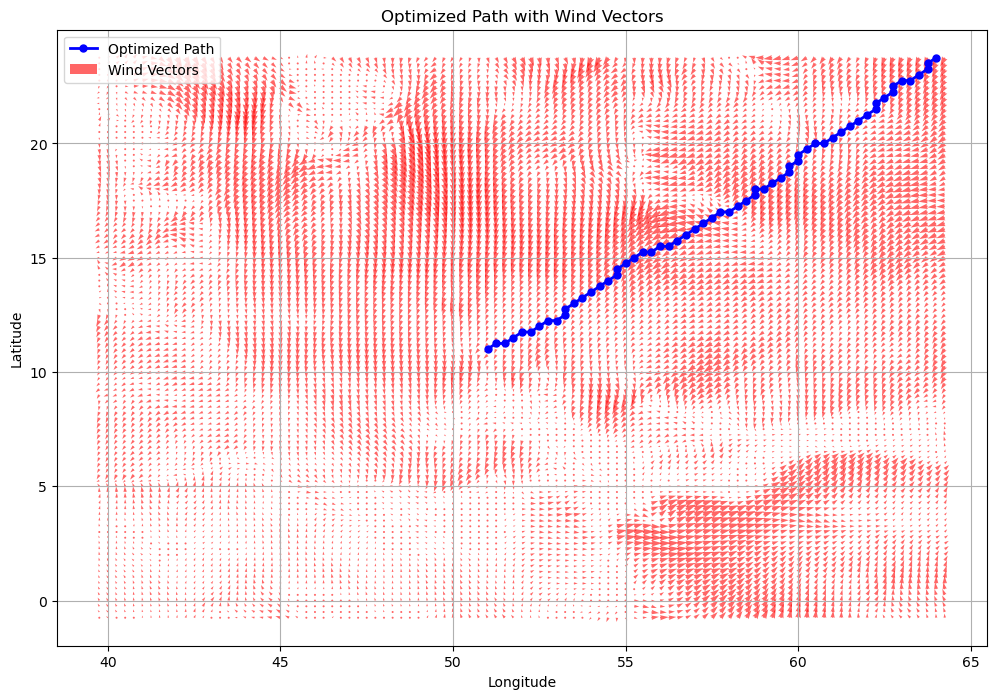

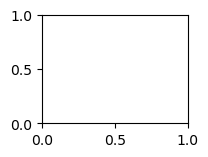

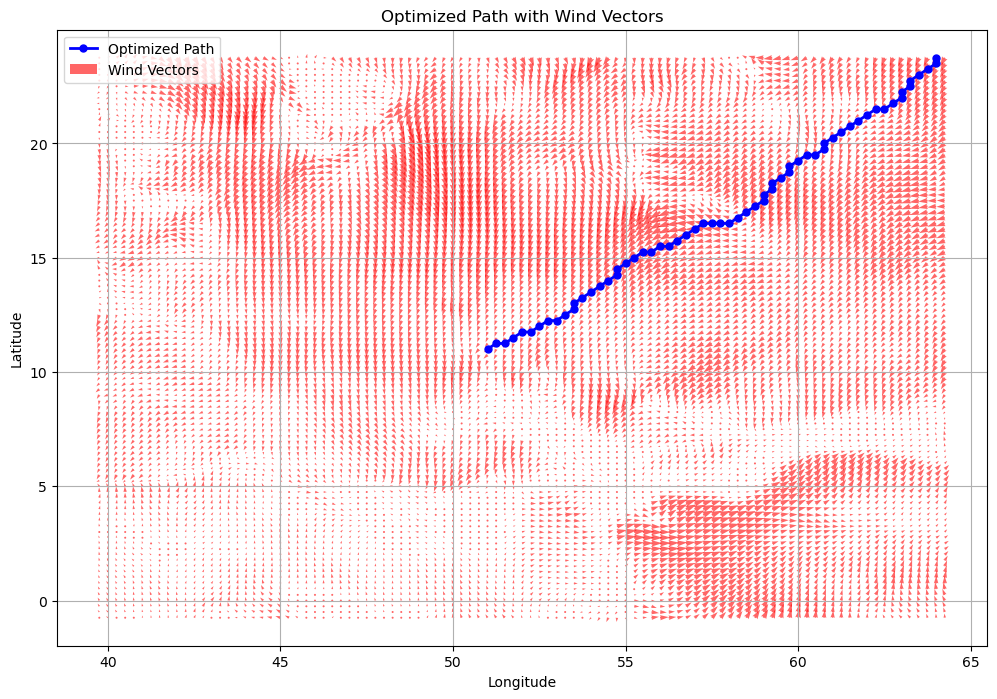

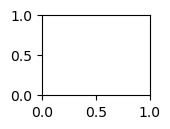

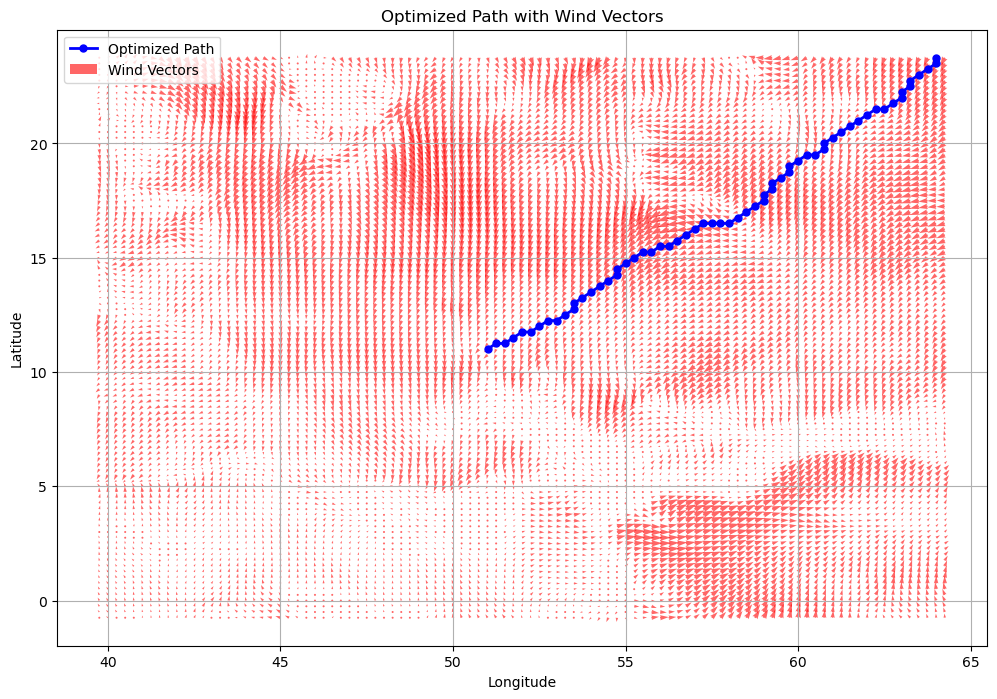

<Axes: >

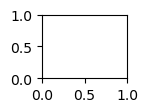

In [34]:
import matplotlib.pyplot as plt
import numpy as np

def plot_path_with_wind(path, u10, v10, lats, lons, title="Optimized Path with Wind Vectors", color='blue'):
    latitudes = path[:, 1]
    longitudes = path[:, 0]
    
    plt.figure(figsize=(12, 8))
    
    
    plt.plot(longitudes, latitudes, color=color, marker='o', linestyle='-', linewidth=2, markersize=5, label="Optimized Path")
    
    # Plot the wind vectors using quiver
    plt.quiver(lons, lats, u10, v10, scale=500, color='red', alpha=0.6, label="Wind Vectors")
    
    plt.title(title)
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.legend()
    plt.grid(True)
    plt.show()


plt.subplot(1,1,1)
plot_path_with_wind(path_t, u10[0], v10[0], latitudes, longitudes)
plt.subplot(2,2,2)
plot_path_with_wind(path_s, u10[0], v10[0], latitudes, longitudes)
plt.subplot(3,3,3)
plot_path_with_wind(path_c, u10[0], v10[0], latitudes, longitudes)
plt.subplot(4,4,4)
plot_path_with_wind(path_p, u10[0], v10[0], latitudes, longitudes)
plt.subplot(5,5,5)

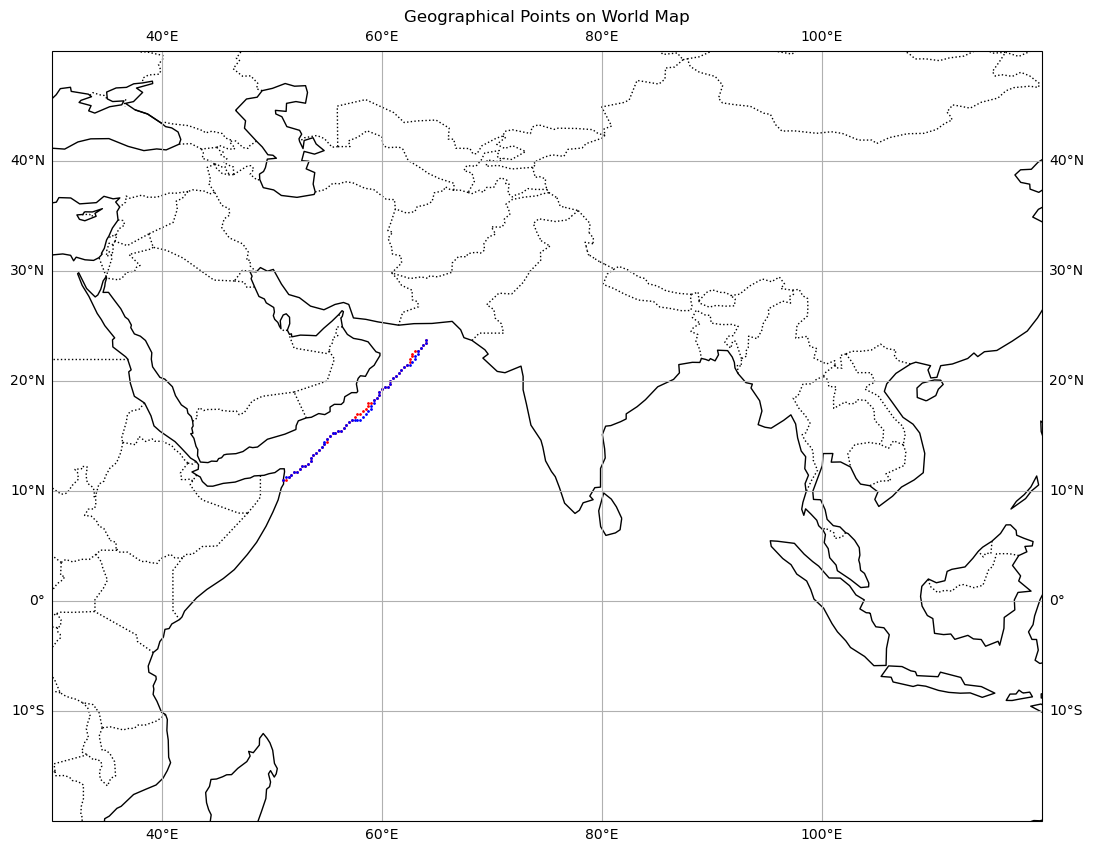

In [35]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature


time_df = pd.DataFrame(path_t)
longitudes = [time_df.loc[i,0] for i in range(time_df.shape[0])]  
latitudes = [time_df.loc[i,1] for i in range(time_df.shape[0])]  

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature


plt.figure(figsize=(15, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent([30, 120, -20, 50], crs=ccrs.PlateCarree())


ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')


for lat, lon in zip(latitudes, longitudes):
    plt.plot(lon, lat, marker='o', color='red', markersize=1, transform=ccrs.PlateCarree())
time_df = pd.DataFrame(path_c)
longitudes = [time_df.loc[i,0] for i in range(time_df.shape[0])]  
latitudes = [time_df.loc[i,1] for i in range(time_df.shape[0])]  
for lat, lon in zip(latitudes, longitudes):
    plt.plot(lon, lat, marker='o', color='blue', markersize=1, transform=ccrs.PlateCarree())


ax.gridlines(draw_labels=True)


plt.title('Geographical Points on World Map')


plt.show()

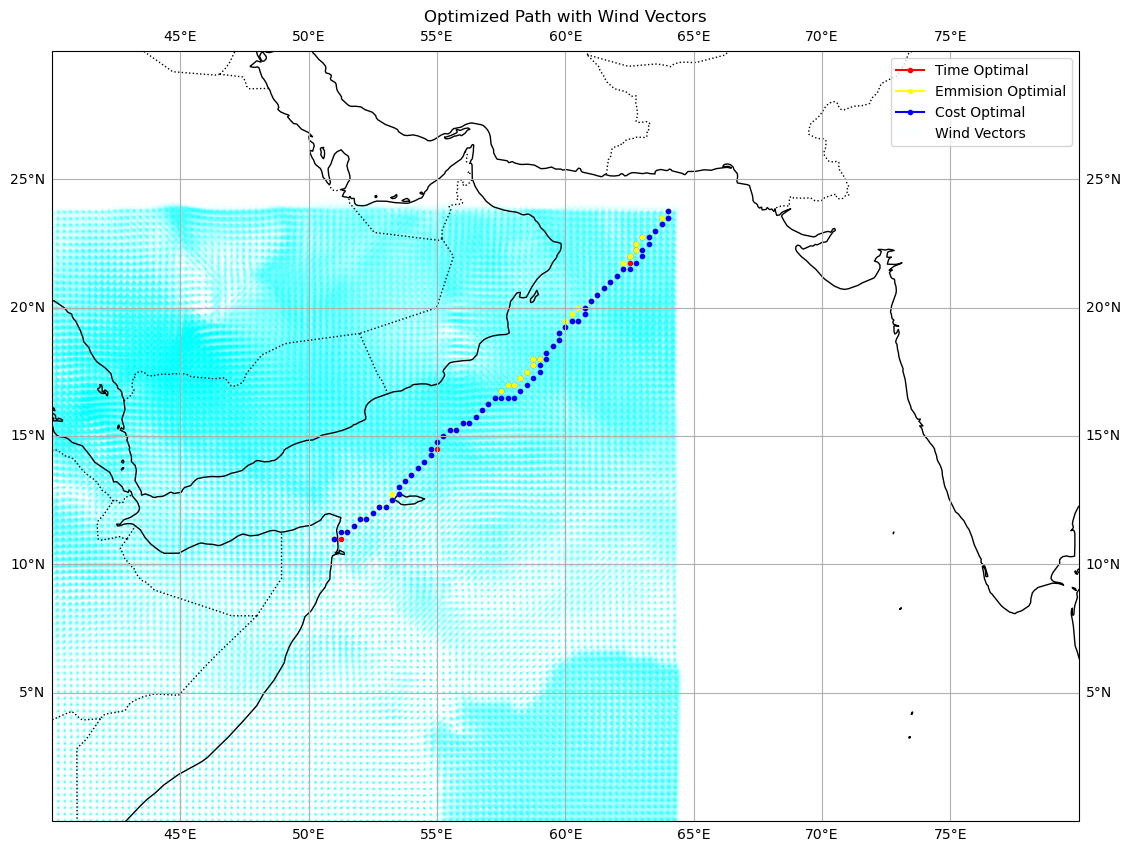

In [47]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
time_df = pd.DataFrame(path_t)
longitudes_t = [time_df.loc[i,0] for i in range(time_df.shape[0])]  
latitudes_t = [time_df.loc[i,1] for i in range(time_df.shape[0])]

plt.figure(figsize=(15, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

# Set the extent of the map (you can adjust these values as needed)
ax.set_extent([40, 80, 0, 30], crs=ccrs.PlateCarree())

# Add features to the map (e.g., coastlines, borders)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
flag = True

# Plot the optimized path (in red and blue)
for lat, lon in zip(latitudes_t, longitudes_t):
    if flag:
        plt.plot(lon, lat, marker='o', color='red', markersize=3, transform=ccrs.PlateCarree(), label="Time Optimal")
        flag=False
    else:
        plt.plot(lon, lat, marker='o', color='red', markersize=3, transform=ccrs.PlateCarree())
        
flag=True

time_df = pd.DataFrame(path_s)
longitudes_co = [time_df.loc[i,0] for i in range(time_df.shape[0])]
latitudes_co = [time_df.loc[i,1] for i in range(time_df.shape[0])]
for lat, lon in zip(latitudes_co, longitudes_co):
    if flag:
        plt.plot(lon, lat, marker='o', color='yellow', markersize=3, transform=ccrs.PlateCarree(), label="Emmision Optimial")
        flag = False
    else:
        plt.plot(lon, lat, marker='o', color='yellow', markersize=3, transform=ccrs.PlateCarree())
time_df = pd.DataFrame(path_c)
longitudes_c = [time_df.loc[i,0] for i in range(time_df.shape[0])]
latitudes_c = [time_df.loc[i,1] for i in range(time_df.shape[0])]
flag = True
for lat, lon in zip(latitudes_c, longitudes_c):
    if flag:
        plt.plot(lon, lat, marker='o', color='blue', markersize=3, transform=ccrs.PlateCarree(), label="Cost Optimal")
        flag= False
    else:
        plt.plot(lon, lat, marker='o', color='blue', markersize=3, transform=ccrs.PlateCarree())

flag=True
Lon, Lat = np.meshgrid(longitudes, latitudes) 
for i in range(u.shape[0]):
    if flag:
        plt.quiver(Lon, Lat, u[i], v[i], scale=500, color='cyan', alpha=0.01, transform=ccrs.PlateCarree(), label="Wind Vectors")
        flag=False
    else:
        plt.quiver(Lon, Lat, u[i], v[i], scale=500, color='cyan', alpha=0.01, transform=ccrs.PlateCarree())


ax.gridlines(draw_labels=True)


plt.title('Optimized Path with Wind Vectors')
plt.legend()

plt.show()



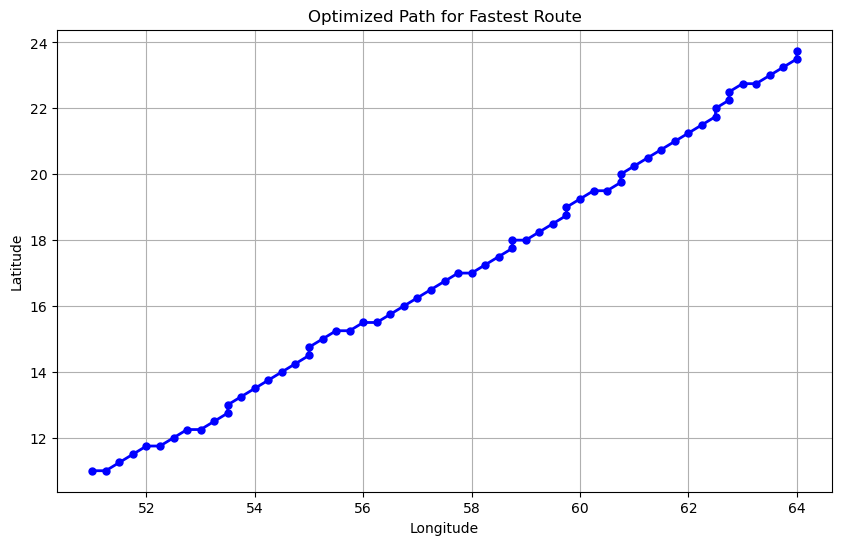

In [37]:
import matplotlib.pyplot as plt
import numpy as np

def plot_path(path, title="Optimized Path", color='blue'):

    latitudes = path[:, 1]
    longitudes = path[:, 0]
    
    plt.figure(figsize=(10, 6))
    plt.plot(longitudes, latitudes, color=color, marker='o', linestyle='-', linewidth=2, markersize=5)
    plt.title(title)
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.grid(True)
    plt.show()

plot_path(path_t, title="Optimized Path for Fastest Route")


ValueError: Argument U has a size 9801 which does not match 62, the number of arrow positions

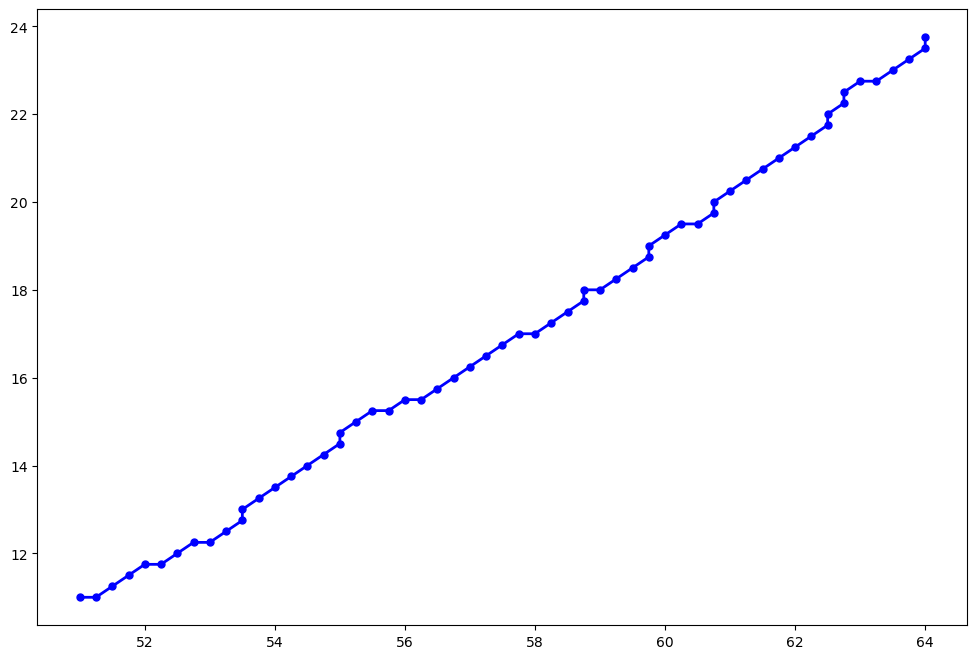

In [38]:
def plot_path_with_wind(path, u10, v10, lats, lons, title="Optimized Path with Wind Vectors", color='blue'):
    
    latitudes = path[:, 1]
    longitudes = path[:, 0]
    
    plt.figure(figsize=(12, 8))
    
    
    plt.plot(longitudes, latitudes, color=color, marker='o', linestyle='-', linewidth=2, markersize=5, label="Optimized Path")
    
    
    plt.quiver(lons, lats, u10, v10, scale=500, color='red', alpha=0.6, label="Wind Vectors")
    
    plt.title(title)
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_path_with_wind(path_t, u10[0], v10[0], latitudes, longitudes, title="Optimized Path with Wind Vectors",)